In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv("Conjunto_Abandono_Escolar_2022_.csv", index_col=0, encoding='latin-1')
df= data.dropna()
data_sorted = data.sort_values(by='Porcentaje_de_abandono_escolar', ascending=False)

print(data_sorted.to_string())

# Guardar archivo limpio y transformado
df.to_csv("data_limpia.csv", index=False)



                      entidad  cve_plantel                                            plantel periodo_semestral  Porcentaje_de_abandono_escolar
cve_ent                                                                                                                                        
7.0                   Chiapas        340.0                                         Pichucalco         2021_2022                            56.4
8.0                 Chihuahua        208.0                                    Ciudad Delicias         2021_2022                            36.1
19.0               Nuevo León        333.0                      Lic. Bárbara Herrera de Garza         2021_2022                            33.4
19.0               Nuevo León         90.0                     Don Protasio Rodríguez Cuéllar         2021_2022                            32.7
9.0          Ciudad de México        230.0                                            Tláhuac         2021_2022                         

In [69]:
columnas = df.columns

# Imprimir las columnas
print("Columnas del archivo CSV:")
for columna in columnas:
    print(columna)

Columnas del archivo CSV:
entidad
cve_plantel
plantel
periodo_semestral
Porcentaje_de_abandono_escolar


GRAFICA DE BARRAS 

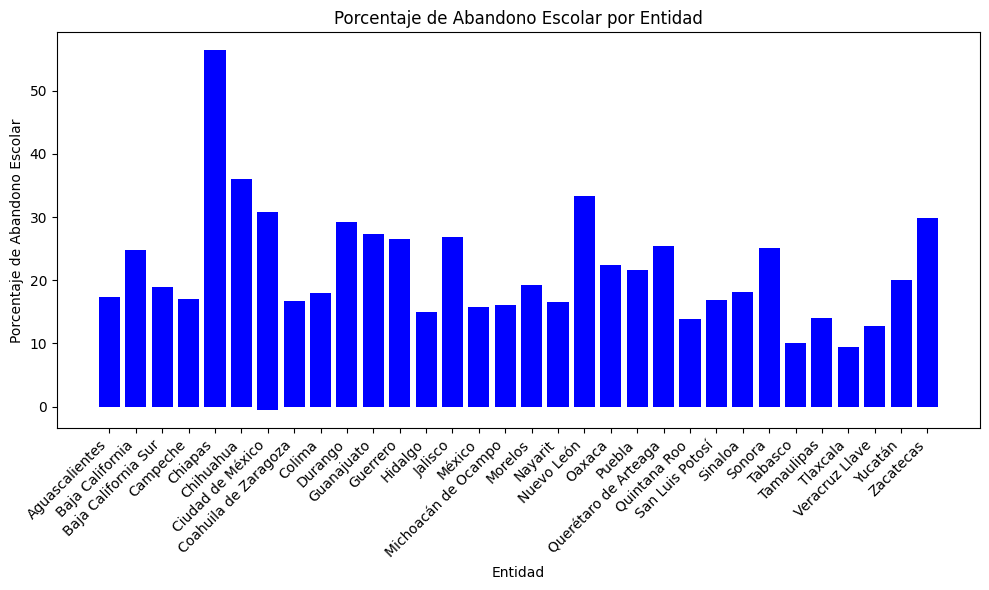

In [70]:
# Grafica de barras
plt.figure(figsize=(10, 6))
plt.bar(df['entidad'], df['Porcentaje_de_abandono_escolar'], color='blue')
plt.xlabel('Entidad')
plt.ylabel('Porcentaje de Abandono Escolar')
plt.title('Porcentaje de Abandono Escolar por Entidad')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

GRAFICA LINEAL  

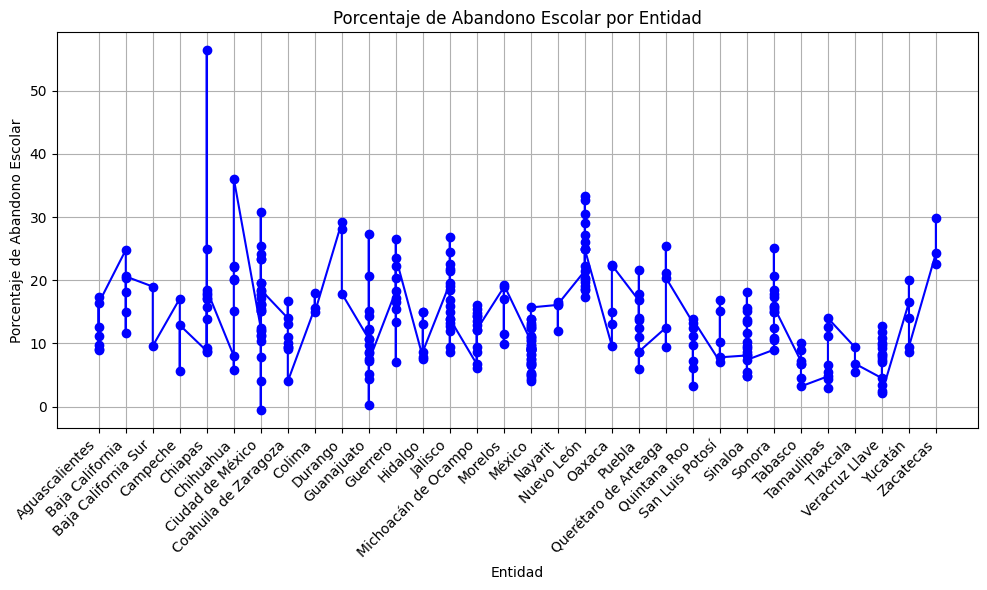

In [74]:
# Crear la gráfica lineal
plt.figure(figsize=(10, 6))
df = df.sort_values(by='entidad')
plt.plot(df['entidad'], df['Porcentaje_de_abandono_escolar'], marker='o', linestyle='-', color='b')

# Personalizar la gráfica
plt.title('Porcentaje de Abandono Escolar por Entidad')
plt.xlabel('Entidad')
plt.ylabel('Porcentaje de Abandono Escolar')
plt.xticks(rotation=45, ha='right') 
plt.grid(True)

plt.tight_layout() 
plt.show()

GRAFICA DE DISPERSIÓN

/tmp/ipykernel_52919/824887104.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_plot = plt.scatter(x=df['periodo_semestral'], y=df['Porcentaje_de_abandono_escolar'], c=colores, s=df['cve_plantel']*4, alpha=0.8, edgecolors='w', cmap='viridis')


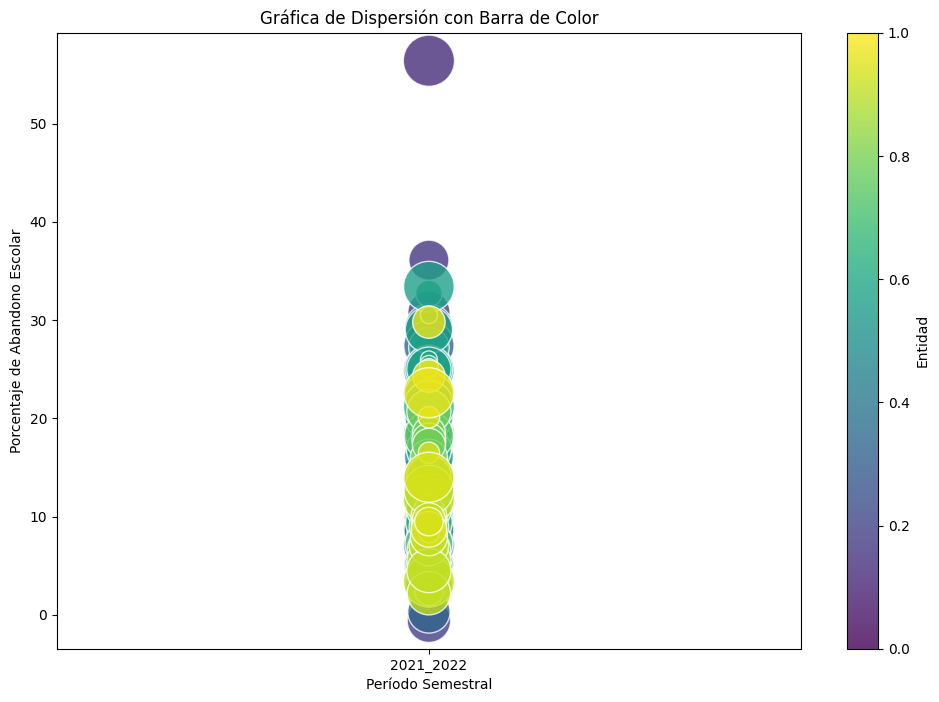

In [60]:
# Crear la gráfica de dispersión con barra de color
plt.figure(figsize=(12, 8))
colores = plt.cm.viridis(df['entidad'].astype('category').cat.codes / len(df['entidad'].unique()))
scatter_plot = plt.scatter(x=df['periodo_semestral'], y=df['Porcentaje_de_abandono_escolar'], c=colores, s=df['cve_plantel']*4, alpha=0.8, edgecolors='w', cmap='viridis')

plt.title('Gráfica de Dispersión con Barra de Color')
plt.xlabel('Período Semestral')
plt.ylabel('Porcentaje de Abandono Escolar')
cbar = plt.colorbar(scatter_plot, label='Entidad')
plt.show()

HISTOGRAMA

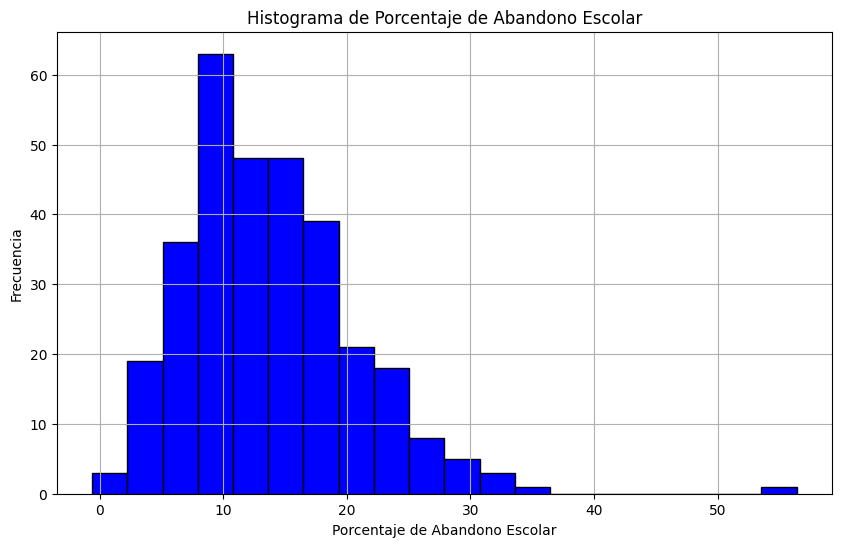

In [61]:
# Crear un histograma con la columna "Porcentaje_de_abandono_escolar"
plt.figure(figsize=(10, 6))
plt.hist(df['Porcentaje_de_abandono_escolar'], bins=20, color='blue', edgecolor='black')
plt.title('Histograma de Porcentaje de Abandono Escolar')
plt.xlabel('Porcentaje de Abandono Escolar')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

GRAFICA DE PASTEL

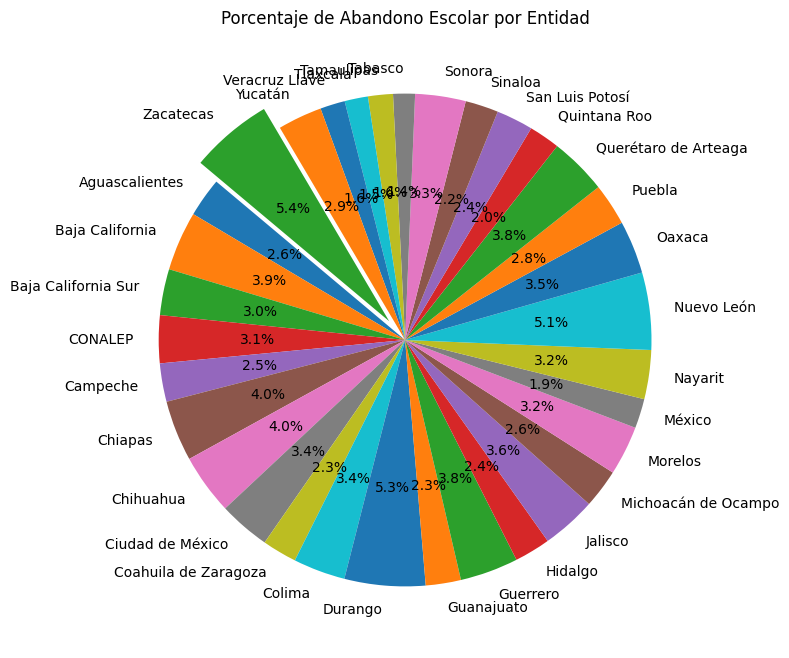

In [65]:
# Agrupar los datos por entidad y calcular el promedio del porcentaje de abandono escolar
promedio_abandono_entidad = data.groupby('entidad')['Porcentaje_de_abandono_escolar'].mean()

#porcente mayor y menor del abandono escolar 
entidad_mayor_abandono = promedio_abandono_entidad.idxmax()
entidad_menor_abandono = promedio_abandono_entidad.idxmin()
explode = [0.1 if entidad == entidad_mayor_abandono else 0 for entidad in promedio_abandono_entidad.index]

plt.figure(figsize=(10, 8))
plt.pie(promedio_abandono_entidad, labels=promedio_abandono_entidad.index, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Porcentaje de Abandono Escolar por Entidad')
plt.show()

MEDIA, MEDIANA Y MODA

In [67]:
moda = df['Porcentaje_de_abandono_escolar'].mode()[0]
media = df['Porcentaje_de_abandono_escolar'].mean()
mediana = df['Porcentaje_de_abandono_escolar'].median()

# Imprimir los resultados
print(f'Moda: {moda}')
print(f'Media: {media}')
print(f'Mediana: {mediana}')

Moda: 8.7
Media: 13.770382165605094
Mediana: 12.8
